In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("economic_index.csv")
df
df1 = df

In [ ]:
#drop uneccessary
df1 = df1.drop('year',axis=1)
df1.head()

,Unnamed: 0,month,interest_rate,unemployment_rate,index_price
0,0,12,2.75,5.3,1464
1,1,11,2.50,5.3,1394
2,2,10,2.50,5.3,1357
3,3,9,2.50,5.3,1293
4,4,8,2.50,5.4,1256
5,5,7,2.50,5.6,1254
6,6,6,2.50,5.5,1234
7,7,5,2.25,5.5,1195
8,8,4,2.25,5.5,1159
9,9,3,2.25,5.6,1167


In [ ]:
df1 = df1.drop('month',axis=1)
df1.head()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
0,0,2.75,5.3,1464
1,1,2.50,5.3,1394
2,2,2.50,5.3,1357
3,3,2.50,5.3,1293
4,4,2.50,5.4,1256
5,5,2.50,5.6,1254
6,6,2.50,5.5,1234
7,7,2.25,5.5,1195
8,8,2.25,5.5,1159
9,9,2.25,5.6,1167


In [ ]:
df1 = df1.drop('Unnamed: 0',axis=1)
df1.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [ ]:
#check null values
df1.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

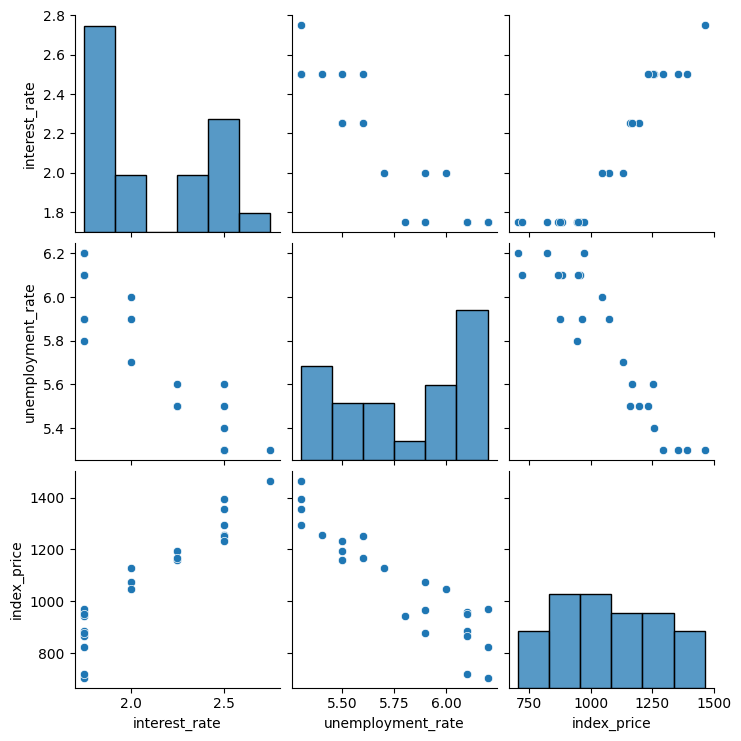

In [ ]:
#visulaization
import seaborn as sns
sns.pairplot(df1)

In [ ]:
df1.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployement Rate')

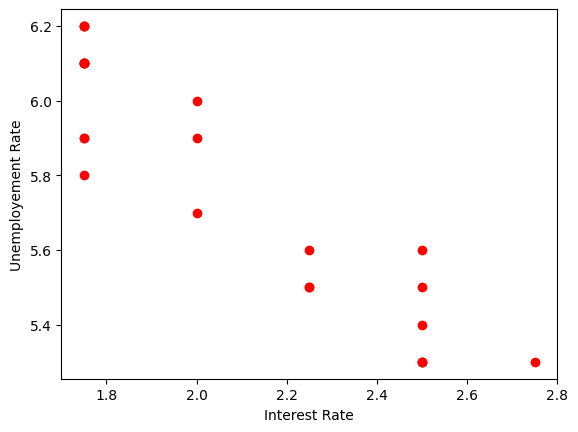

In [16]:
plt.scatter(df1['interest_rate'],df1['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployement Rate")

In [20]:
## first way , X = df1[['interest_rate','unemployment_rate']]

X = df1.iloc[:,:-1] #select all the rows except last row
y = df1.iloc[:,-1]

In [22]:
X.head()


0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

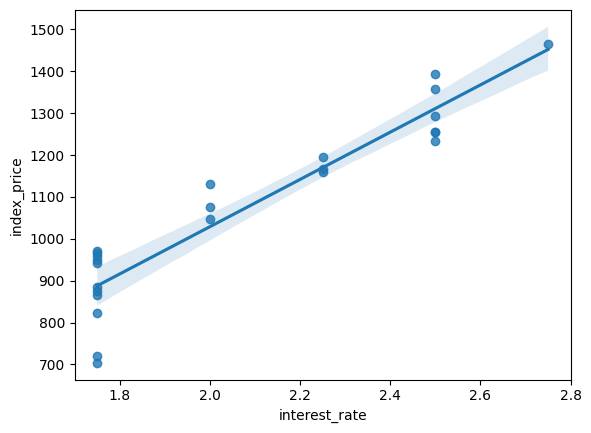

In [32]:
sns.regplot(x=df1['interest_rate'], y=df1['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

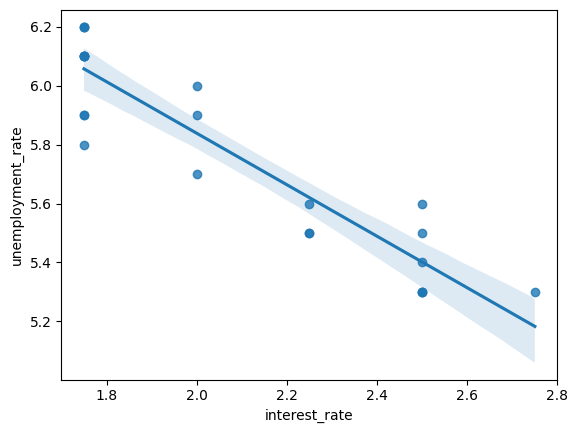

In [31]:
sns.regplot(x=df1['interest_rate'], y=df1['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

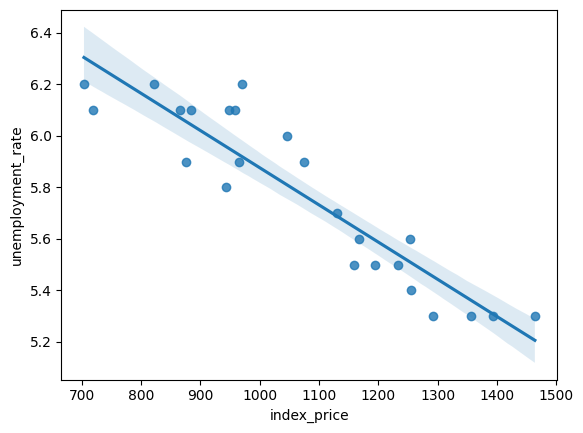

In [34]:
sns.regplot(x=df1['index_price'], y=df1['unemployment_rate'])

In [35]:
from sklearn.preprocessing import StandardScaler

In [37]:
s = StandardScaler()
X_train= s.fit_transform(X_train)
X_test= s.fit_transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression
regression =  LinearRegression()

In [40]:
regression.fit(X_train,y_train)

LinearRegression()

In [49]:
from sklearn.model_selection import cross_val_score
#we have to pass estimator which is bascially our model
score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
avg = np.mean(score)
avg

-5914.828180162392

In [50]:
#prediction
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [51]:
#performance matrice
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
mse  = mean_squared_error(y_test,y_pred)
mae  = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(mse)

8108.567426306604
73.80444932337097
8108.567426306604


In [53]:
#R square
from sklearn.metrics import r2_score

In [54]:
score  = r2_score(y_test,y_pred)
score

0.7591371539010257

In [55]:
#adjusted r2
r2_adj =  1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
r2_adj

0.5985619231683761

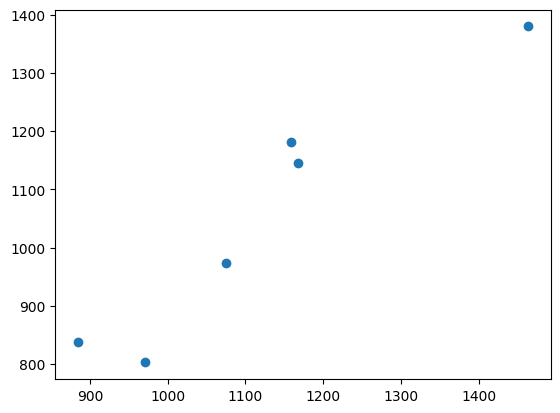

In [56]:
##Assumptions
plt.scatter(y_test,y_pred)

In [57]:
residuals =y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


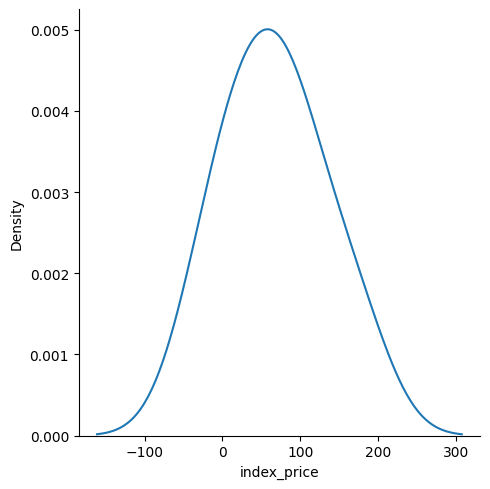

In [58]:
##Plot residual
sns.displot(residuals,kind='kde')

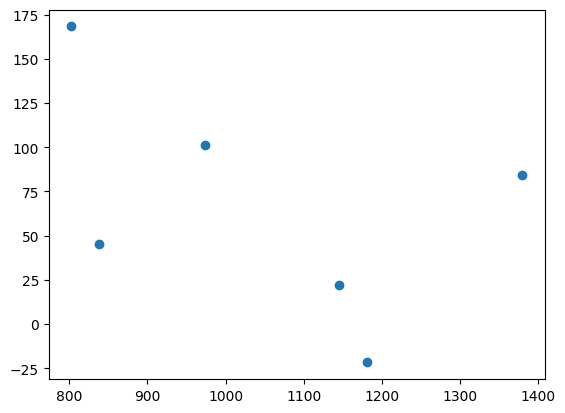

In [59]:
##catter plot wrt to prediction and residual
plt.scatter(y_pred,residuals)

In [60]:
#OLS Linear Regression
import statsmodels.api as sm

In [61]:
model = sm.OLS(y_train,X_train).fit()

In [ ]:
predict  = model.predict(X_test)
print(predict)

In [63]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 02 Feb 2024   Prob (F-statistic):                       0.754
Time:                        18:56:12   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [64]:
print(regression.coef_)

[  88.27275507 -116.25716066]
